<a href="https://colab.research.google.com/github/garestrear/ninja-pythonist/blob/master/NoSupervisado/AprendizajeNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

________________
# <center> Aprendizaje supervisado </center>
________________

En el aprendizaje supervisado asumimos que existe una función $f$ entre las características $X$ y las etiquetas $Y$: 
$$Y = f(X)$$
$f$ es desconocida y entonces los objetivos del aprendizaje supervisado se centran en encontrar un modelo $\hat{f}$ que aproxime lo mejor posible a $f$: $$\hat{f} \approx f.$$
$\hat{f}$ puede ser una regresión, un árbol de decisión, ...


<p align="center">
<img src="https://raw.githubusercontent.com/garestrear/ninja-pythonist/master/NoSupervisado/Supervisado.png">
</p>

________________
# <center> Aprendizaje no supervisado </center>
________________

En el aprendizaje no supervisado contamos con las caracaterísticas $X$, pero no con las etiquetas $Y$.

<p align="center">
<img src="https://raw.githubusercontent.com/garestrear/ninja-pythonist/master/NoSupervisado/NoSupervisado.png">
</p>

El objetivo de un algoritmo de aprendizaje no supervisado es crear un modelo que tome las características $X$ como entrada y nos devuelva unas nuevas características o  un valor que se puede utilizar para resolver un problema práctico. Por ejemplo, en la <u><em>reducción de dimensionalidad</em></u>, la salida del modelo serán una cantidad de características inferior  a la entrada original $X$. En el <u><em> agrupamiento </em></u>, el modelo devuelve la identificación del grupo para cada observación en el conjunto de datos.

________________
# <center> Reducción de dimensionalidad </center>
________________


<h4>
La reducción de dimensionalidad es el proceso de tomar datos en un espacio de alta dimensión y llevarlos a un nuevo espacio cuya dimensionalidad es mucho más pequeña.
</h4>

<h4>
Hay varias razones para reducir la dimensionalidad de los datos:
</h4>
<h4>
$\circ$ filtrar características no tan relevantes y conservar la mayor cantidad posible de las interesantes,
</h4>
<h4>
$\circ$ los datos de alta dimensión imponen desafíos computacionales,
</h4>
<h4>
$\circ$ la reducción de dimensionalidad es ideal para explorar y mejorar nuestra comprensión sobre un conjunto de datos.
</h4> 

## <center> <u> Componente principales ─ PCA </u> </center>

<div align='justify'>
<h4>
Los componentes principales son vectores que definen un nuevo sistema de coordenadas en el que el primer eje va en la dirección de la varianza más alta en los datos. El segundo eje es ortogonal al primero y va en la dirección de la segunda varianza más alta en los datos. El tercer eje sería ortogonal tanto al primer como al segundo eje e iría en la dirección de la tercera varianza más alta y así sucesivamente.
</h4>

scikit-learn tiene una implemenatción de `PCA`:

el método `fit()` aprende cómo mover y rotar los datos para que estén alineados con los ejes coordenados

el método `transform()` lleva a cabo la transformación que se aprendió con el método `fit()`, puede ser aplicado sobre nuevos datos

antes de usar `PCA` es importante estandarizar los datos 
$z = (x - u) / s$
donde $u$ es la media de las muestras de entrenamiento o cero si `with_mean = False`, y `s` es la desviación estándar de las muestras de entrenamiento o uno si `with_std = False`, lo hacemos con `StandardScaler`



Estandarice las características eliminando la media y escalando a la varianza de la unidad 

In [1]:
import pandas as pd 

In [2]:
# Cada fila representa medidas para un pez individual entre ellas peso (g), 
# largo (cm), altura (?), cocientre entre altura y largo,...
fish = pd.read_csv('fish.csv', header = None)
display(fish.sample(5))
print("")
samples = fish.drop(columns=[0])
display(samples.sample(5))

,0,1,2,3,4,5,6
6,Bream,500.0,26.8,29.7,34.5,41.1,15.3
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
7,Bream,390.0,27.6,30.0,35.0,36.2,13.4
49,Roach,200.0,22.1,23.5,26.8,27.6,15.4
29,Bream,920.0,35.0,38.5,44.1,40.9,14.3


,1,2,3,4,5,6
6,500.0,26.8,29.7,34.5,41.1,15.3
7,390.0,27.6,30.0,35.0,36.2,13.4
82,1600.0,56.0,60.0,64.0,15.0,9.6
35,69.0,16.5,18.2,20.3,26.1,13.9
38,120.0,18.6,20.0,22.2,28.0,16.1


In [3]:
especies = fish[0]
# especies.value_counts()

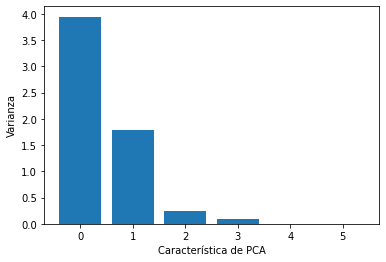

In [4]:
# Importando los paquetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Estandarizar las características eliminando la media y escalando a la varianza 
# de la unidad 
scaler_1 = StandardScaler()

# Creamos una instancia de PCA
pca_1 = PCA()

# Creamos pipeline
pipeline_1 = make_pipeline(scaler_1, pca_1)

# Ajustamos el pipeline a nuestros datos
pipeline_1.fit(samples)

# Graficamos
features = range(pca_1.n_components_)
plt.bar(features, pca_1.explained_variance_)
plt.xlabel('Característica de PCA')
plt.ylabel('Varianza')
plt.xticks(features)
plt.show()


¿Según la gráfica anterior sería razonable decir que la dimensión intrisica del conjunto de datos? Recordar que la dimensión intrínseca es el número de características de PCA con varianza significativa.

In [5]:
# Importando los paquetes
from sklearn.decomposition import PCA

# Creamos una instancia de PCA: pca
pca_2 = PCA(n_components=2)

# Creamos pipeline
pipeline_2 = make_pipeline(scaler_1, pca_2)

# Ajustamos el pipeline a nuestros datos
pipeline_2.fit(samples)

# Hallamos las características de PCA
pca_2_features = pipeline_2.transform(samples)

# imprimimos 
print(pca_2_features.shape)

(85, 2)


¿Qué seguiría una vez tengo esta reducción?

Advertencia: No es recomndable usar pipelines del tipo
 `datos → PCA → algoritmo supervisado`

Pues estandarizamos nuestros datos para usar `PCA`, esto incluso si usamos un algoritmo que requiera estandarización.

**P:** ¿Qué debería usarse en su lugar para reducir la dimensión de los conjuntos de datos en las tareas de aprendizaje supervisado?

*R:* Primero podemos calcular, por ej. el coeficiente de correlación de Pearson o el coeficiente de correlación de Spearman entre cada característica y la etiqueta. Luego descartamos aquellas características que no están correlacionadas con la etiqueta.

También podemos entrenar un modelo simple como Lasso y solo mantener las características de gran importancia. La documentación de scikit-learn tiene una lista completa de métodos de selección de funciones.

**P:** ¿Existe algún escenario en el aprendizaje supervisado en el que podamos usar PCA?

*R*: PCA es ideal para explorar y comprender un conjunto de datos. 

## <center> <u> t-SNE </u> </center>


<div align='justify'>
<h4>

</h4>

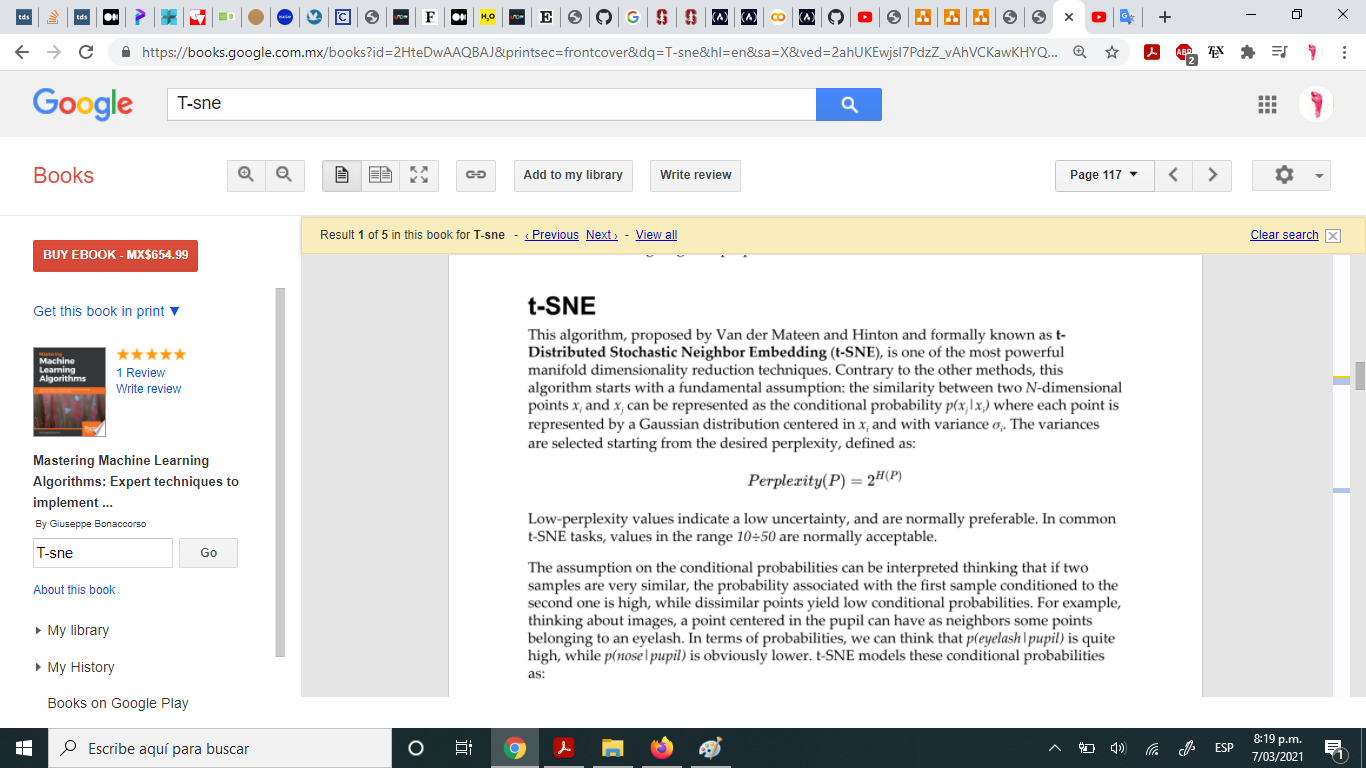

________________
# <center> Agrupamiento ─ Clustering </center>
________________

<div align='justify'>
<h4>
$\circ$ Una vez se han reducido el conjunto de características originales a un conjunto más pequeño y manejable, podemos encontrar patrones interesantes agrupando instancias similares de datos. 
</h4>
<h4>
$\circ$ El objetivo aquí es agrupar datos con base en su similitud: comparar cuán similares son los datos de una observación a los datos de otras observaciones. No se usan etiquetas.
</h4>
<h4>
$\circ$ Así un <strong> grupo (cluster) </strong> en este contexto hace referencia a un conjunto de datos con características similares. 
</h4>
<h4>
$\circ$ El agrupamiento (clustering) se puede lograr con una variedad de algoritmos de aprendizaje no supervisados. Exploraremos los algoritmos <em> k-medias (k-means)</em> y <em>agrupamiento jerárquico (hierarchical clustering)</em>.
</h4>
</div>

## <center> <u> k-medias ─ k-means </u> </center>


<div align='justify'>
<h4>
$\circ$ El agrupamiento k-medias es un método para encontrar grupos y centros de grupos en un conjunto de datos sin etiquetar. Se elige el número deseado de centros de grupos, por ejemplo, R. Dado un conjunto inicial de centros, el algoritmo alterna los pasos: 
</h4>
<h4>
1. Para cada centro identificamos el subconjunto de puntos de entrenamiento (su grupo) que están más cerca de él que cualquier otro centro;
</h4>
<h4>
2. Se cálcula el centro del grupo así: se calculan las medias de cada característica para los puntos de datos de cada grupo, y este vector de medias se convierte en el nuevo centro de ese grupo.
</h4>
<h4>
Estos dos pasos se repiten hasta la convergencia. Normalmente, los centros iniciales son observaciones elegidas aleatoriamente de los datos de entrenamiento. 
</h4>
<h4>
$\circ$ Diferentes ejecuciones de k-medias darán como resultado asignaciones de grupos ligeramente diferentes pues esta inicialización aleatoria es una fuente de aleatoriedad, lo que resulta en asignaciones de agrupamiento ligeramente diferentes, de una ejecución de k-medias a otra. 
</h4>

<h4>
$\circ$ El valor de R, el número de grupos, es un hiperparámetro que debe ser ajustado por el analista de datos. Existen algunas técnicas para seleccionar R. Ninguno de ellas ha demostrado ser óptima. La mayoría requiere que el analista haga una "suposición fundamentada" al observar algunas métricas o al examinar visualmente las asignaciones de grupos.
</h4>
<h4>
$\circ$ <em>Fuerza de predicción (prediction strength)</em> es un método para determinar el número de grupos. Consiste en dividir los datos en conjuntos de entrenamiento y pruebas, como en aprendizaje supervisado.
</h4>
<h4>
$\circ$ El algoritmo optimiza los grupos minimizando la variación dentro del grupo (también conocida como inercia) de modo que la suma de las variaciones dentro del grupo en todos los R grupos sea lo más pequeña posible.
</h4>

In [13]:
# Importando los paquetes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Estandarizar las características eliminando la media y escalando a la varianza 
# de la unidad 
scaler_2 = StandardScaler()

# Creamos una instancia de kmeans
kmeans = KMeans(n_clusters=4)

# Creamos pipeline
pipeline_3 = make_pipeline(scaler_2, kmeans)

# Ajustamos el pipeline a nuestros datos
pipeline_3.fit(samples)

# Calculamos las etiquetas de los grupos
labels = pipeline_3.predict(samples)

# Veamos cómo agrupo KMeans
labels_2 = pd.Series(labels)
print('Así agrupó nuestro algoritmo KMeans')
print(labels_2.value_counts())

Así agrupó nuestro algoritmo KMeans
2    34
1    21
0    17
3    13
dtype: int64


In [7]:
print('REALIDAD')
print(especies.value_counts())
print('')
print('KMeans')
print(labels_2.value_counts())

# # Creamos un DataFrame con las etiquetas y especies como columnas
# df = pd.DataFrame({'KMeans': labels, 'REALIDAD': especies})
# print('')
# # Create crosstab
# ct = pd.crosstab(df['REALIDAD'], df ['KMeans'])
# print("")
# print(ct)

REALIDAD
Bream    34
Roach    20
Pike     17
Smelt    14
Name: 0, dtype: int64

KMeans
1    34
2    21
3    17
0    13
dtype: int64


Medir cualidad del agrupamiento

Un buen agrupamiento tiene grupos reducidos, lo que significa que las observaciones dentro de cada grupo no están dispersas.
Medimos cuan dispersas están las observaciones dentro de cada grupo por medio de la "inercia". 

La inercia de un modelo KMeans es medida automáticamente cuando el método `fit` es usado y está disponible como un atributo. KMeans tiene como objetivo colocar los grupos de tal manera que s eminimice la inercia.

In [19]:
print(pipeline_3[1].inertia_)

98.61206407528326


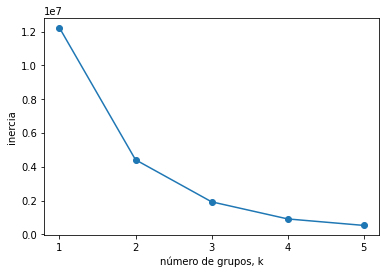

[12236483.035294117, 4415811.592684728, 1923693.8383257918, 910047.4006882801, 525824.7125367648]


In [44]:
# Diferentes valores de k
ks = range(1,6)
inertias = []

for k in ks:
  # Creamos una instancia de KMeans con k clusters
  model = KMeans(n_clusters = k)

  # Ajustamos el modelo a los datos
  model.fit(samples)
  
  # Append inertia a la lista de inercias
  inertias.append(model.inertia_)

# Grafica de ks vs inercias
plt.plot(ks, inertias, '-o')
plt.xlabel('número de grupos, k') 
plt.ylabel('inercia')
plt.xticks(ks)
plt.show()

print(inertias)

## <center> Agrupamiento jerárquico ─ Hierarchical clustering</center>
### <center> <u> Agrupamiento aglomerativo </u> </center>

<div align='justify'>
<h4>
Una posible desventaja de la agrupación de K-medias es que requiere que pre-especifiquemos el número de agrupaciones K. La agrupación jerárquica es un enfoque alternativo que no requiere que nos comprometamos con una elección particular de K. La agrupación jerárquica tiene una ventaja adicional sobre Agrupación de K-medias porque da como resultado una representación atractiva basada en árboles de las observaciones, llamada dendrograma. 
</h4>


<p align="center">
<img src="https://raw.githubusercontent.com/garestrear/ninja-pythonist/master/NoSupervisado/agrupamiento_jerarquico_aglomerativo.png">
</p>

<div align='justify'>
<h4>
$\circ$ Los métodos de agrupamiento jerárquico producen representaciones jerárquicas en las que los grupos en cada nivel de la jerarquía se crean fusionando grupos en el siguiente nivel inferior. En el nivel más bajo, cada grupo contiene una única observación. En el nivel más alto, solo hay un grupo que contiene todos los datos.
</h4>

<h4>
$\circ$ Las estrategias para la agrupación jerárquica se dividen en dos paradigmas básicos: aglomerativo (de abajo hacia arriba) y divisivo (de arriba hacia abajo). Nos centraremos en agrupamiento aglomerativo.
</h4>


<h4>
$\circ$ Los algoritmos de agrupamiento aglomerativo comienzan con cada observación representado un grupo único. En cada uno de los N-1 pasos, los dos grupos más cercanos (menos disímiles) se fusionan en un solo grupo, produciendo un grupo menos en el siguiente nivel. Por lo tanto, se debe definir una medida de disimilitud entre dos grupos de observaciones. 
</h4>



In [120]:
import scipy
grains = pd.read_csv('grains.csv', header = None)
grains = grains.drop(columns=[7])
varieties = pd.read_csv('varieties.csv', header = None)
varieties = varieties.drop(columns=[1])

In [121]:
var = list(varieties[0])

In [122]:
ar = [list(grains.iloc[k].values) for k in range(len(grains))]

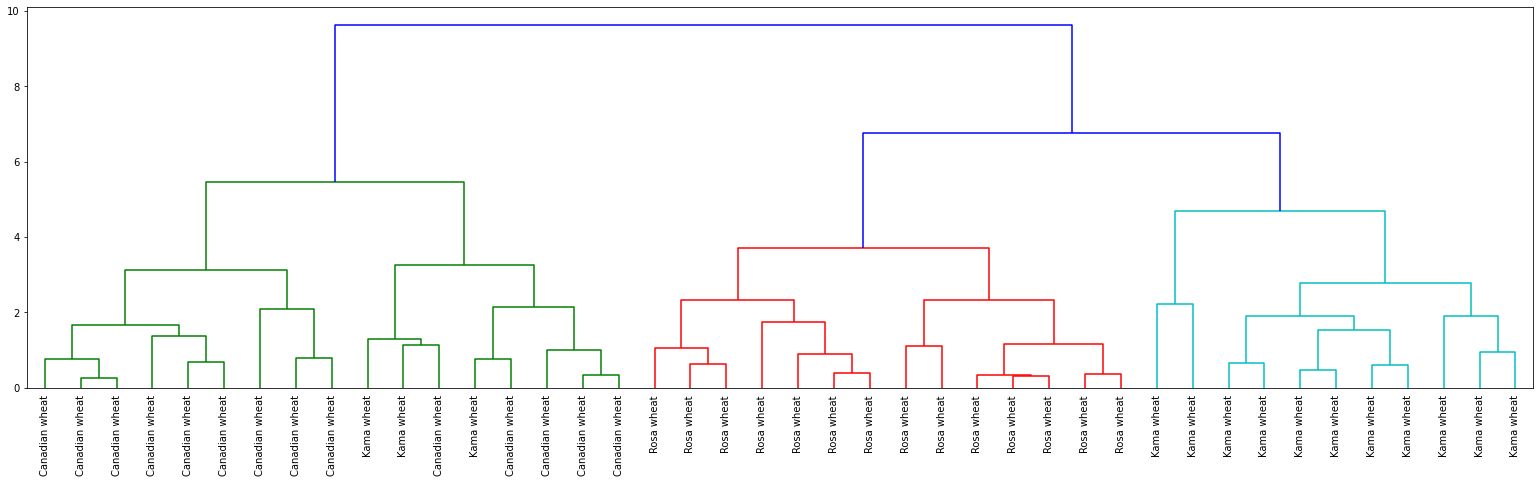

In [123]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
fig = plt.subplots(1,1, figsize=(27,7))

# Calculate the linkage: mergings
mergings = linkage(ar, method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings, labels=var, leaf_rotation=90, leaf_font_size=10)
plt.show()

El agrupamiento jerárquico no es solo una herramienta visual. Podemos extraer  los agrupamientos en estados intermedios del agrupamiento jerárquico. Las etiquetas de estos grupos intermedios pueden ser usados en otros calculos.

Un estado intermedio de un agrupamiento en este caso es especificado al escoger una altura en el dendograma. El eje y del dendrograma codifica la distancia entre grupos fusionados y la distancia entre grupos está definida por un método "linkage method".

`complete linkage method`: la distancia entre los grupos es  la máxima distancia entre sus observaciones.


Diferentes `linkage methodes` prducen diferentes  agruoamientos jerárquicos

<p align="center">
<img src="https://raw.githubusercontent.com/garestrear/ninja-pythonist/master/
NoSupervisado/linkage_methods.png">
</p>




Las etiquetas de grupos  para cualquier estado intermedio en el agrupamiento jerárquico pueden ser extraídas usando la función `fcluster()` la cuál devuelve un arreglo en numpy de las etiquetas de los grupos

In [124]:
# Importando los paquetes necesarios
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# # Calculamos el linkage
# mergings = linkage(ar, method = 'single')

# fig = plt.subplots(1,1, figsize=(21,7))

# # Graficamos el dendrograma
# dendrogram(mergings, labels=var, leaf_rotation= 90, leaf_font_size=10)
# plt.show()

# Usando fcluster para extraer las etiquetas
labels_3 = fcluster(mergings, 6, criterion = 'distance')

# Creando df con  etiquetas y variedades como columnas
df2 = pd.DataFrame({'etiquetas':labels_3, 'variedades': var})

# Creando crosstab
ct2 = pd.crosstab(df2['etiquetas'], df2['variedades'])

#mostrando ct2
print(ct2)


variedades  Canadian wheat  Kama wheat  Rosa wheat
etiquetas                                         
1                       14           3           0
2                        0           0          14
3                        0          11           0
